In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Cargue la imagen de trabajo y visualícela.

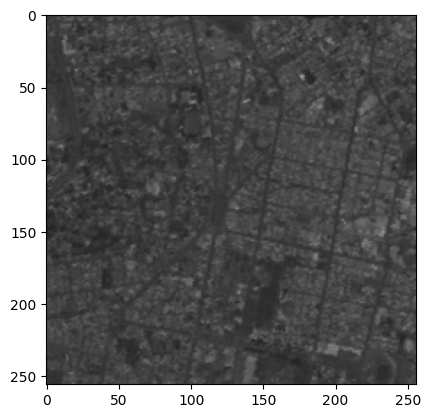

In [57]:
quito = cv2.imread("./images/QUITO.png")

plt.imshow(quito, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

# Visualice el histograma de la imagen. Describa su forma. ¿Cuáles son los niveles de gris mínimo y máximo?.



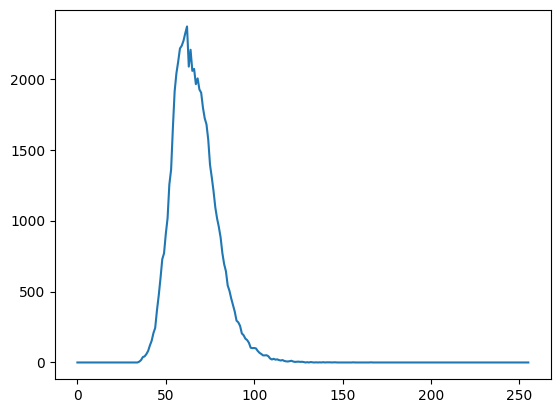

In [58]:
hist = cv2.calcHist([quito],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

In [59]:
min = float("inf")
max = -float("inf")

for i in range(len(quito)):
    for j in range(len(quito[i])):
        if quito[i][j][0] > max:
            max = quito[i][j][0]
        if quito[i][j][0] < min:
            min = quito[i][j][0]
min,max = int(min), int(max)
min,max


(35, 166)

Se puede observar en el histograma que el rango de colores es muy limitado, esto debido a que en el histograma solo se observan colores entre el rango  de 35 y 166, el resto de colores tienen 0% de representación. Es por esto que la forma del histograma muestra una sola "montaña" en su forma y el resto de colores fuera de la montaña tienen un valor de 0. El nivel de gris minimo es de 35 y el máximo es de 166. 

# Efectúe una expansión del contraste, visualice la imagen resultado y el histograma correspondiente. ¿En qué consiste la mejora de la imagen?

In [60]:
def get_ab(li, ls):
    b = ((255 * li)/(li - ls))
    a = (255/(ls - li))
    return a,b

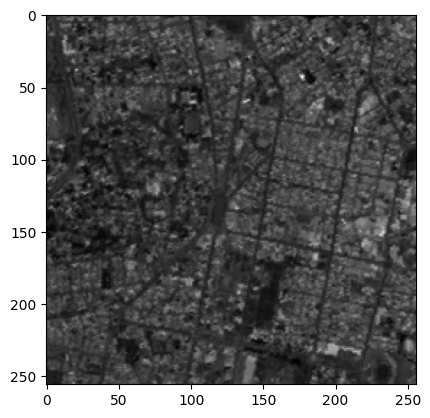

In [61]:
a,b = get_ab(min,max)
expansion = cv2.convertScaleAbs(quito, alpha= a, beta= b)
plt.imshow(expansion, cmap= 'gray', vmin = 0, vmax= 255)
plt.show()

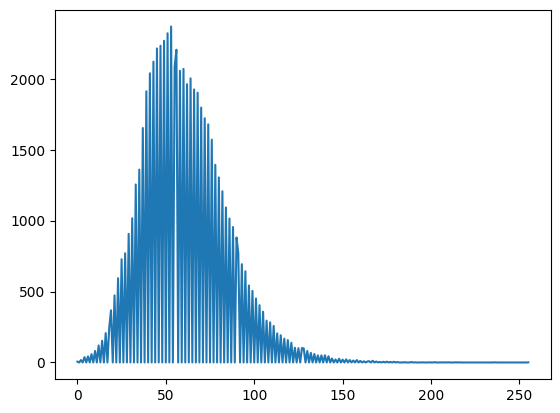

In [62]:
hist = cv2.calcHist([expansion],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

Después de aplicar la transformación se puede observar que la imagen aumenta su nitidez y se puede apreciar más facilmente las calles de la ciudad y las divisiones dentro de las cuadras de la ciudad.

# Efectúe 3 calibraciones diferentes del histograma sobre la imagen original, entre los valores 50-100, 40-120 y 35-166. Visualice los resultados.

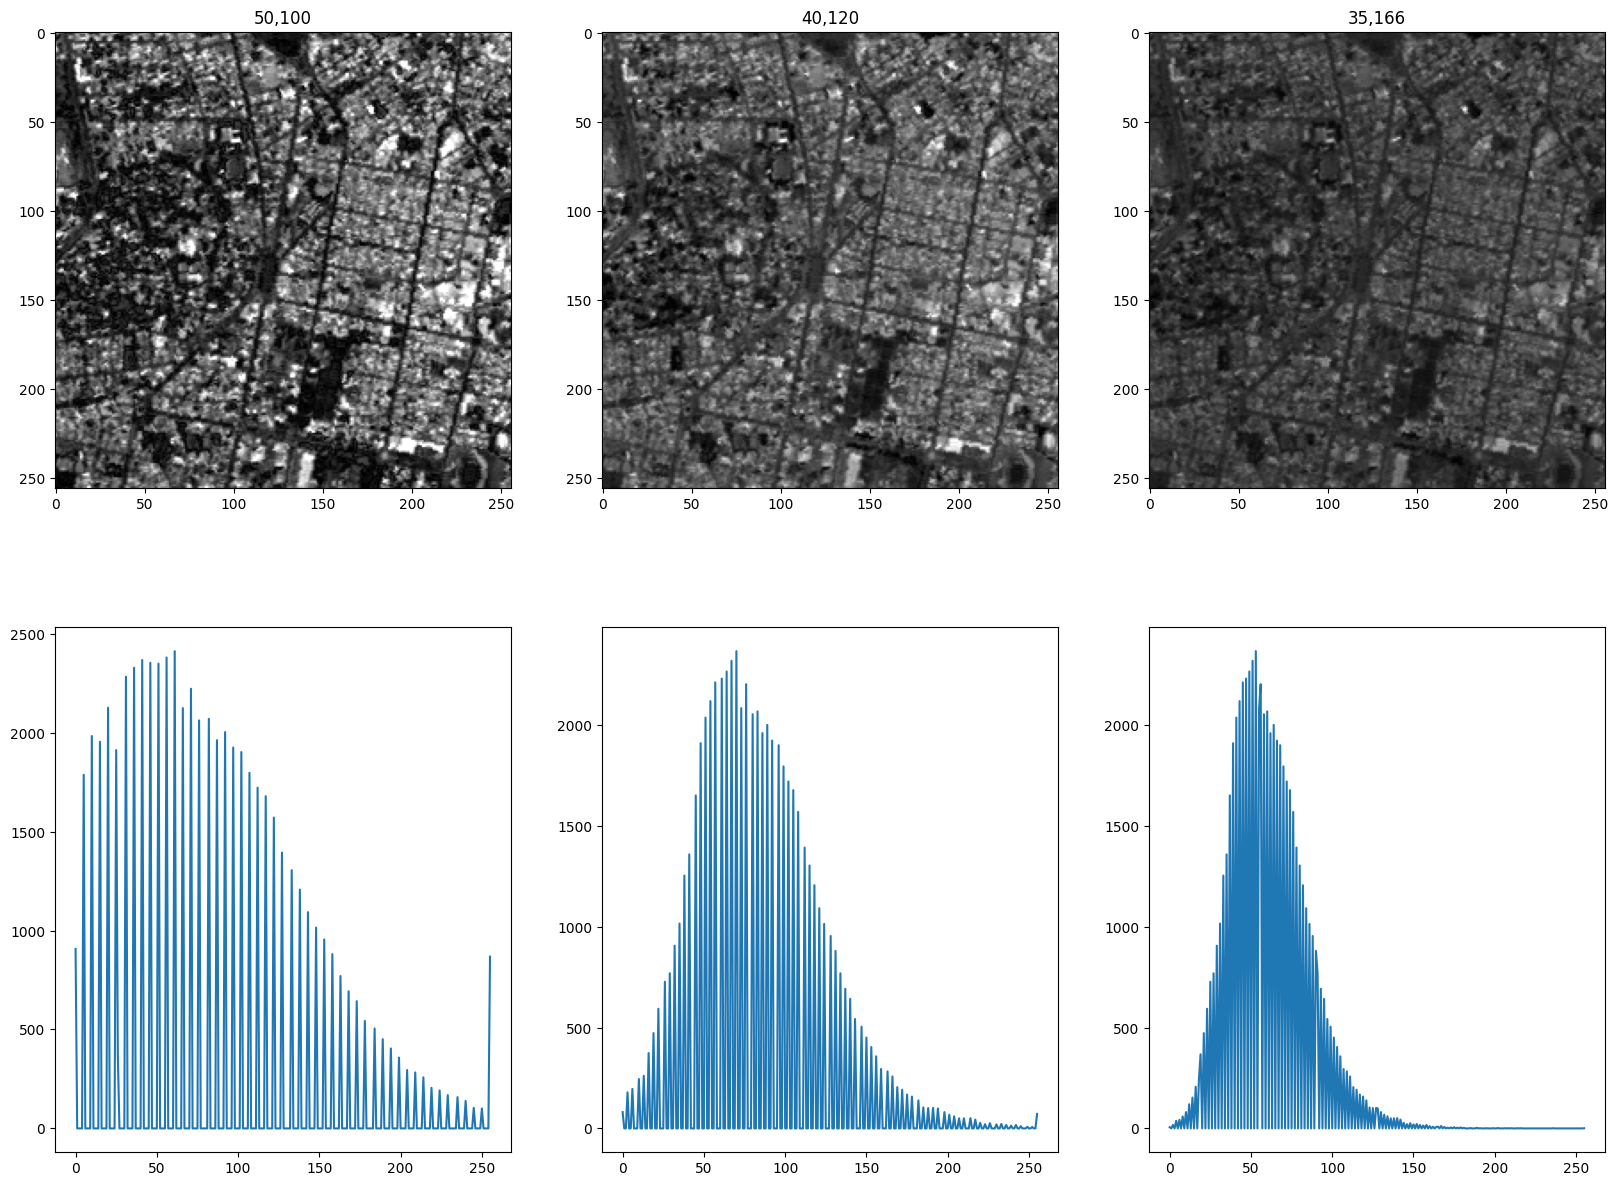

In [67]:
a,b = get_ab(50,100)
expansion_1 = cv2.convertScaleAbs(quito, alpha= a, beta= b)
hist_1 = cv2.calcHist([expansion_1],[0],None,[256],[0,256])

a,b = get_ab(40,120)
expansion_2 = cv2.convertScaleAbs(quito, alpha= a, beta= b)
hist_2 = cv2.calcHist([expansion_2],[0],None,[256],[0,256])

a,b = get_ab(35,166)
expansion_3 = cv2.convertScaleAbs(quito, alpha= a, beta= b)
hist_3 = cv2.calcHist([expansion_3],[0],None,[256],[0,256])

fig, axes = plt.subplots(2,3, figsize = (20,15)) 
axes[0][0].imshow(expansion_1, cmap= 'gray', vmin = 0, vmax= 255)
axes[0][0].set_title('50,100')
axes[1][0].plot(hist_1)

axes[0][1].imshow(expansion_2, cmap= 'gray', vmin = 0, vmax= 255)
axes[0][1].set_title('40,120')
axes[1][1].plot(hist_2)

axes[0][2].imshow(expansion_3, cmap= 'gray', vmin = 0, vmax= 255)
axes[0][2].set_title('35,166')
axes[1][2].plot(hist_3)

plt.show()

# ¿Cuál es la diferencia entre estas imágenes? ¿Cuál presenta el mejor contraste? ¿Cuál permite ver mejor los detalles? ¿Por qué la calibración entre 35 y 166 da el mismo resultado que la expansión del contraste efectuada en el punto 4? ¿Conclusión?

La diferencia entre las imagenes radica en los valores del alpha y el betha a la hora de realizar la transformación. 

La imagen que presenta un mejor contraste es la que define los limites entre 50 y 100, esto debido a que es el rango que mejor acoge el rango de colores en el que se encuentran la gran mayoría de pixeles en la imagen original. 

Con respecto a detalles, la imagen que mejor los conserva es la de 35 y 166, esto debido a que este rango acoge todos los pixeles ya que es el rango en el que están todos los pixeles en la imagen original, es por esto que no se pierde tanto detalle comparado con las otras imagenes que tienen un rango que no abarca todos lo pixeles de la imagen original.

La calibración entre 35 y 166 da el mismo resultado que el anterior debido a que el limite 35 corresponde con el color más oscuro de la imagen original y el color 166 corresponde con el color más claro. Es por esto que la transformación es identica.